# Simple Evolutionary Exploration  Walkthrough

This notebook contains instructions on how to use the SEE module, along with several examples. These instructions will cover the following parts: 
* [Import Image Files](#Import_Image_Files)
* [Manual Search](#Manual_Search)
* [Genetic Algorithm Search](#Genetic_Algorithm_Search)
* [Reading the Results](#Reading_the_Results)

----
<a name="Import_Image_Files"></a>

## Import Image Files

First import the following packages:

In [1]:

%matplotlib inline
import matplotlib.pylab as plt
import imageio
from see import Segmentors
from see import JupyterGUI

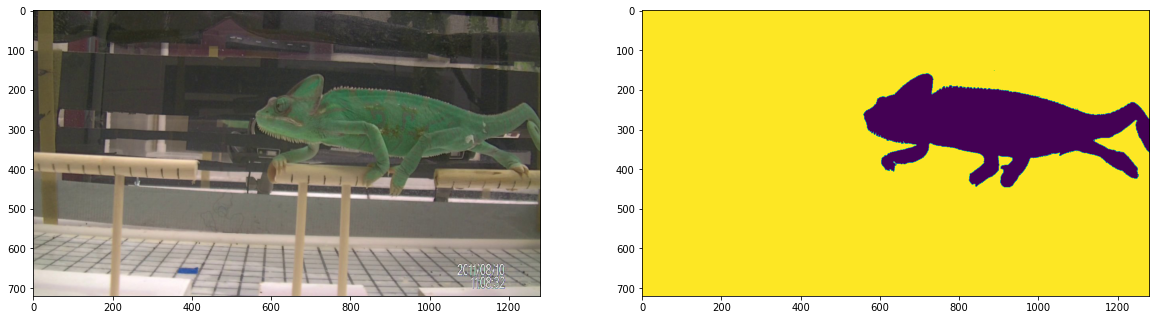

In [2]:
import imageio

img = imageio.imread('Image_data/Examples/AA_Chameleon.jpg')
gmask = imageio.imread('Image_data/Examples/AA_Chameleon_GT.png')

fig = plt.figure(figsize=(20, 20))
my_ax = fig.add_subplot(1, 2, 1)
my_ax.imshow(img)
my_ax = fig.add_subplot(1, 2, 2)
my_ax.imshow(gmask)

In [3]:
from see import base_classes

# put data in a pipeline
data = base_classes.pipedata()
data.img = img
data.gmask = gmask

----
<a name="Genetic_Algorithm_Search"></a>

## Genetic Algorithm Search

First import image files, as well as the following packages:

In [4]:
from see.Segmentors import segmentor
from see.ColorSpace import colorspace
from see.Workflow import workflow
from see.Segment_Fitness import segment_fitness
from see import base_classes, GeneticSearch

#define an algorithm workflow
workflow.addalgos([colorspace, segmentor, segment_fitness])

To run the genetic algorithm, we need to initialize an instance of an evolver. The original image and ground truth segmentation image are inputs to it, along with an integer value for population size. This value sets how many indivudals are in our population. For this example, we'll set this number to be equal to 10.

In [5]:
#TODO This needs to be fixed Using the new syntax.
#my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=10)
my_evolver = GeneticSearch.Evolver(workflow, data, pop_size=100)

Now that the evolver has been initialized, we can run the genetic algorithm for a specified number of generations (or iterations). Here we will set this number equal to 5.

In [6]:
x = Segmentors.SlicO()

In [ ]:
# warnings may appear when this runs
population = my_evolver.run(ngen=50)

Initializing a new random population
Generation 0/50 of population size 100
<class 'see.Workflow.workflow'> parameters: 
	colorspace = YCbCr
	multichannel = True
	channel = 2
	algorithm = ColorThreshold
	alpha1 = 0.921875
	alpha2 = 0.51953125
	beta1 = 0.921875
	beta2 = 0.0703125
	gamma1 = 0.76953125
	gamma2 = 0.27734375
	n_segments = 4
	max_num_iter = 10

Time: 0.663 s
fitness=0.07165581597222222

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YUV
	multichannel = True
	channel = 0
	algorithm = ColorThreshold
	alpha1 = 0.0859375
	alpha2 = 0.28515625
	beta1 = 0.73828125
	beta2 = 0.109375
	gamma1 = 0.40625
	gamma2 = 0.91015625
	n_segments = 8
	max_num_iter = 10

Time: 0.666 s
fitness=1

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YDbDr
	multichannel = False
	channel = 0
	algorithm = Watershed
	alpha1 = 0.21875
	alpha2 = 0.18359375
	beta1 = 0.76953125
	beta2 = 0.7578125
	gamma1 = 0.9296875
	gamma2 = 0.64453125
	n_segments = 7
	max_num_iter = 15

Time: 1.077 s
fit

In [ ]:
import matplotlib.pyplot as plt
fit=my_evolver.fitnessTracking()
print(fit)
plt.scatter(range(len(fit)),fit)
plt.yscale("log")

----
<a name="Reading_the_Results"></a>

## Reading the Results

After the genetic algorithm is complete, we can retrieve the individuals that resulted in the lowest (best) fitness values by printing `my_evolver.hof`. These individuals are sorted according to fitness value, so to get the overal best individual, we can simply look at the first individual in the list. 

In [ ]:
params = my_evolver.hof[0]

print('Best Individual:\n', params)
params.fitness

In [ ]:
my_evolver.hof[0:5]

We can see the mask this individual generates by evaluating it, then plotting the result:

In [ ]:
seg = workflow(my_evolver.hof[0])
data1 = seg.runAlgo(data)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(data1.img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(data1.mask)
plt.title("Segmentation")
plt.axis('off')

plt.tight_layout
plt.show()

In [ ]:
seg = workflow(params)
data = seg.runAlgo(data)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(data.img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(data.mask)
plt.title("Segmentation")
plt.axis('off')

plt.tight_layout
plt.show()

We can also use `FitnessFunction` to calculate the final fitness value for this algorithm:

In [ ]:
import copy

In [ ]:
print('Fitness Value: ', data.fitness)
import copy

In [ ]:
datas=[copy.deepcopy(data) for i in range(len(my_evolver.hof[:]))]
segs=[workflow(i) for i in my_evolver.hof[:]]
datas=[segs[i].runAlgo(datas[i]) for i in range(len(segs))]

for i in datas:
    plt.figure(figsize=(20, 10))
    plt.subplot(121)
    plt.imshow(i.img)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(i.mask)
    plt.title("Segmentation")
    plt.axis('off')

    plt.tight_layout
    plt.show()

In [ ]:
from see.Segment_Fitness import FitnessFunction
FitnessFunction(datas[3].mask,datas[1].mask)

In [ ]:
import numpy as np
import see.ActiveLearning as al
def GeneratePairs(size):
    pairs=[]
    for i in range(size):
        for j in range(i+1,size):
            pairs.append([i,j])
    return pairs
GeneratePairs(4)
def UncertaintyValue(segmenters,data):
    dataCopies=[copy.deepcopy(data) for i in range(len(segmenters))]
    segs=[workflow(i) for i in segmenters]
    dataCopies=[segs[i].runAlgo(dataCopies[i]) for i in range(len(segs))]
    uncertainty=np.mean([FitnessFunction(dataCopies[i[0]],dataCopies[i[1]]) for i in GeneratePairs(len(dataCopies))])
    return uncertainty

al.UncertaintyValue(my_evolver.hof[0:4],data)

In [ ]:
def unique_models(tpop):
    uniqueMods=[]
    for mod in tpop:
        test=False
        for checkedMod in uniqueMods:
            if mod==checkedMod:
                test=True
            
        if not test:
            uniqueMods.append(copy.deepcopy(mod))
    return uniqueMods
len(unique_models(my_evolver.hof[:]))

In [ ]:
al.ActiveArgs(my_evolver.hof[0])

In [ ]:
my_evolver.hof[0]

In [ ]:
for data in datas:
    print(data.fitness)

In [ ]:
data1.fitness